In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#%matplotlib inline

In [2]:
def normalize(v):
    l2 = np.linalg.norm(v, ord=2)
    v = v / l2
    return v


In [21]:
rng = np.random.default_rng()
A = rng.random((3, 1))
A

array([[0.8386362 ],
       [0.53626534],
       [0.69337366]])

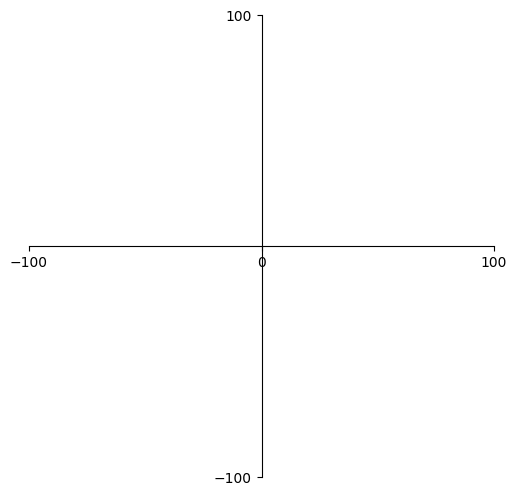

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
max_limit = 100
ax.set_xlim(-1*max_limit, max_limit)
ax.set_ylim(-1*max_limit, max_limit)
ax.set_xticks([-1*max_limit, 0, max_limit])
ax.set_yticks([-1*max_limit, max_limit])

dim = 2

# 下軸と左軸をそれぞれ中央へもってくる
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# 上軸と右軸を表示しない
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 非負だと収束
# ペロン＝フロベニウスの定理
rng = np.random.default_rng()
A = rng.random((dim, dim))

x = rng.random((dim, 1)) * 100
#x = normalize(x) 

ims = []
for i in range(3):
    im = ax.plot([0, x[0, 0]], [0, x[1, 0]])
    ims.append(im)
    
    
    x = A @ x
    #x = normalize(x)
    im = ax.plot([0, x[0, 0]], [0, x[1, 0]])
    ims.append(im)

ani = animation.ArtistAnimation(fig, ims, interval=1000)
ani.save("output.gif", writer="pillow")



In [40]:
dim = 2
A = rng.random((dim, dim))
x = normalize(rng.random((dim, 1)))

for i in range(100):
    x_new = normalize(A @ x)
    dist = np.linalg.norm(x_new - x, ord=2)

    if dist <= 0.00000000001:
        break
        
    print(i, dist)
    x = x_new

0 0.050206076913417
1 8.045047488228084e-05
2 1.325375566325876e-07
3 2.1835820897218135e-10


In [25]:
x


array([[0.97574589],
       [0.25762894]])

In [26]:
y

array([[0.62333402],
       [0.91788284]])

In [27]:
x - y

array([[ 0.35241187],
       [-0.66025391]])

0.7484178958412291